# Project Purpose - Building an ML feature engineering pipeline for near shore Energy Capacity or Early warning systems

## Using XGBoost for Time Series Data
------
------

Building a feature engineering pipeline using sci-kit learn by creating new aggregation column from existing oceangraphic wave data by calculting wave engery flux column. This transforms the raw data into a meaningful feature that better represents the underlying problem (predicting energy capacity at pionts in time) to the predictive model, thus improving model accuracy, performance, and interpretability.

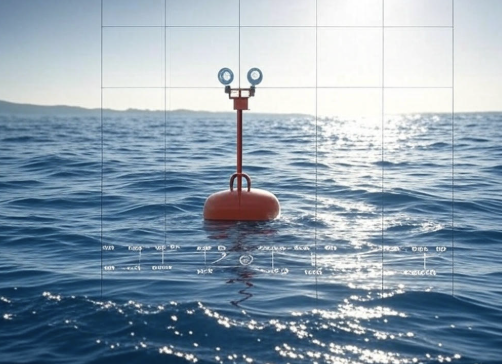.  

## Business Solution

-----------
-----------

A strategy to minimize extraction costs can be to predict the characteristics of the waves, opening up the opportunity of lower operational
costs as maximum energy load can be accurately known days or even hours in advance. Analysis of oceanographic wave data calculated in real-time from near shore wave
buoy sensors offer an opportunity to better monitor behavior of waves near shore and predict future patterns
allowing more frequent and timely energy transmission from shallow water extractors to un-waiting smart electricity grids onshore.

## ML feature pipeline - Process Flow Diagram
------------------
-------------------








## The data set

----
----

The data is collected from wave buoys off the coast of Ireland via MQTT protocols to identify new predictive measures for use of onshore analytical platform performance.

This analysis incorporates real-time wave data obtained from two locations of the west coast of Ireland, Belmullet, and Galway Bay are used. The oceanographic data is captured from a number of sensors on board the Belmullet wave buoy, Galway Bay Wave Buoy and Galway Bay Wave Buoy no.2 selected for modeling most notably are
datetime, peak period, Peak direction, upcross period (secs), (secs) and Significant Wave Height (cm), extracted from the open data source provided by the marine institute.

Identify categorical vs. numeric data from selected
variables;

* PeakPeriodSec
* PeakDirectionDegrees 
* UpcrossPeriodSec
* SignificantWaveHeightcm 
* TemperatureDegrees
* Hmax_cm 
* Thmax_sec 
* MeanCurDirToDegrees 
* MeanCurSpeedMperSec




In [1]:
import numpy as np
from IPython.display import display, Math, Latex

# 1. Feature Engineering & Extraction - new aggregation column based on existing features in the dataset
_______________

* Start to design a new aggregation column from existing oceangraphic wave data.

* calculting wave engery flux column results in a new column in the training data set that measures 
the wave power in __kilowatts (kW) per metre of wavefront length__.


#### 1.1 Identify the Wave Energy Flux Formula used in calculation:
-------

__Full Wave Energy Flux Formula:__

In [2]:
display(Math(r'P = \frac{\rho g^2} {64\pi}H^2_m0 T_e\approx   (0.5 \frac {kW}{m^3 s}) H^2_m0 T_e,'))

display(Math(r'P = 0.49 * H^2 8 * T_p'))

display(Math(r'Results = kW / metre  '))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------

In [3]:
import pandas as pd
wavedata = pd.read_csv('/Users/johnryan/Downloads/Documents/Data Sets/WaveBNetwork30Min.csv', low_memory=False)
wavedata = wavedata.set_index("time")
wavedata.head(4)

,station_id,PeakPeriod,PeakDirection,UpcrossPeriod,SignificantWaveHeight,SeaTemperature,Hmax,THmax,MeanCurDirTo,MeanCurSpeed,...,PeakPeriod_qc,PeakDirection_qc,UpcrossPeriod_qc,SeaTemperature_qc,Hmax_qc,THmax_qc,MeanCurDirTo_qc,MeanCurSpeed_qc,longitude,latitude
time,,,,,,,,,,,,,,,,,,,,,
UTC,NaN,s,degrees_true,s,cm,degree_C,cm,s,degrees_true,m/s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,degrees_east,degrees_north
2014-05-01T00:00:00Z,Belmullet Wave Buoy Berth B,NaN,NaN,NaN,NaN,NaN,224,9.16,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.1429,54.233932
2014-05-01T00:00:00Z,Belmullet Wave Buoy Berth A,NaN,NaN,NaN,NaN,NaN,325,10.15,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.270277,54.284718
2014-05-01T00:00:00Z,Galway Bay Wave Buoy,4.55,224.87912,2.85,54,12.31,74,4.57,90.10989,0.115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.271,53.227


#### 1.3 Map the feature columns to Wave Energy flux formula
----------


__The calculation requires two inputs from the data set:__

__P__ = wave energy flux per unit of wave-crest length

__Hm0__ = the significant wave height in Metres.   --------> __SignificantWaveHeightcm__ (convert to Metres)

__Te__ = wave energy period in seconds. ---------> __PeakPeriodSec__ 

__ρ__ the water density and.  ------> __0.49 constant__

__g__ the acceleration by gravity. ----> __Standard: 9.81 m/s²__

__New Feature Name__ = __WavePower_kW_per_m__

# 2. Builing the Transformation Pipeline 
_______________

### 2.0     Data Transformations required

__Data Cleaning:__

 * Drop features where all rows = NaN/Null or column average = 0
 * Drop row 0 contaianing unit of measurment names.

__Feature Engineering pipeline:__
 * Null/ NaN value inputation: Knn or median.
 * Convert SignificantWaveHeightcm from Cm to Metres.
 * Calculate wave enrgy flux as new column as target
 * Encode feature to numerical
 * Feature scaling / normaializing

__Feature selection - Dimensionalty reduction__
* Identify & drop low variance features where large percent of values are the same.
* Correlation filter
* Model-based importance (e.g., from random forest or XGBoost) with ranking

## 2.1 Data Cleaning (pre-processing)

#### 2.1.1 Drop features where all rows = zero or NaN

In [4]:
##Drop features where all rows = NaN/Null or column average = 0
##wavedata.drop(columns=cols_zer_or_null, inplace=True)
#drop station_id 
##wavedata = wavedata.drop(columns=['station_id'], inplace=True)

##find features where all rows = NaN/Null or column average = 0 and add to a list
cols_zer_or_null = wavedata.columns[((wavedata == 0) | (wavedata.isna())).all()].tolist()

# extra standard columns want to drop
extra_cols = ['station_id']  # remove station id
all_dropped_cols = cols_zer_or_null + extra_cols

# Step 3: Drop columns
wavedata.drop(columns=all_dropped_cols, inplace=True, errors='ignore')  # errors='ignore' to skip if not found
wavedata = wavedata.iloc[1:] #drop the first row(0) units of measure

# Step 4: Log the dropped columns
print("Dropped columns:", all_dropped_cols)

 #Save log to text file
with open("dropped_columns_log.txt", "w") as f:
    for col in all_dropped_cols:
        f.write(col + "\n")

Dropped columns: ['SignificantWaveHeight_qc', 'PeakPeriod_qc', 'PeakDirection_qc', 'UpcrossPeriod_qc', 'SeaTemperature_qc', 'Hmax_qc', 'THmax_qc', 'MeanCurDirTo_qc', 'MeanCurSpeed_qc', 'station_id']


#### 2.1.2 Null/ NaN value inputation:median value

In [5]:
from sklearn.impute import SimpleImputer

#transform values of dtype object to numeric
for col in wavedata.columns:
    if col != 'time':
        wavedata[col] = pd.to_numeric(wavedata[col], errors='coerce')
        
#transform time to datatime
wavedata['time'] = pd.to_datetime(wavedata.index, errors='coerce', utc=True)

#impute mean to numeric columns omnly, time column remains same
numeric_cols = wavedata.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
wavedata[numeric_cols] = imputer.fit_transform(wavedata[numeric_cols])


## 2. 2 Feature Engineering pipeline

## 2.2.3  Calculate wave enrgy flux as new column as target



In [6]:
#Convert SignificantWaveHeightcm from Cm to Meters
wavedata = wavedata.rename(columns = {'SignificantWaveHeight': 'SignificantWaveHeightm'})
wavedata['SignificantWaveHeightm'] = wavedata['SignificantWaveHeightm'] / 100

#Calculate wave enrgy flux as new column as target
wavedata['WavePower_kW_per_m'] = 0.49 * (wavedata['SignificantWaveHeightm'] ** 2) * wavedata['PeakPeriod']
wavedata

,PeakPeriod,PeakDirection,UpcrossPeriod,SignificantWaveHeightm,SeaTemperature,Hmax,THmax,MeanCurDirTo,MeanCurSpeed,longitude,latitude,time,WavePower_kW_per_m
time,,,,,,,,,,,,,
2014-05-01T00:00:00Z,10.449689,258.278585,6.371214,2.512306,11.403892,224.000000,9.160000,170.178670,0.152992,-10.142900,54.233932,2014-05-01 00:00:00+00:00,32.318006
2014-05-01T00:00:00Z,10.449689,258.278585,6.371214,2.512306,11.403892,325.000000,10.150000,170.178670,0.152992,-10.270277,54.284718,2014-05-01 00:00:00+00:00,32.318006
2014-05-01T00:00:00Z,4.550000,224.879120,2.850000,0.540000,12.310000,74.000000,4.570000,90.109890,0.115000,-9.271000,53.227000,2014-05-01 00:00:00+00:00,0.650122
2014-05-01T00:02:00Z,10.000000,254.500000,6.780000,1.620000,11.100000,389.456294,8.919277,170.178670,0.152992,-10.142900,54.233932,2014-05-01 00:02:00+00:00,12.859560
2014-05-01T00:05:00Z,10.449689,258.278585,6.371214,2.512306,12.270000,389.456294,8.919277,170.178670,0.152992,-9.271000,53.227000,2014-05-01 00:05:00+00:00,32.318006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-30T23:55:00Z,10.449689,258.278585,6.371214,2.512306,9.700000,389.456294,8.919277,170.178670,0.152992,-9.271000,53.227000,2016-04-30 23:55:00+00:00,32.318006
2016-05-01T00:00:00Z,10.449689,258.278585,6.371214,2.512306,11.403892,285.000000,7.010000,170.178670,0.152992,-10.142900,54.233932,2016-05-01 00:00:00+00:00,32.318006
2016-05-01T00:00:00Z,10.449689,258.278585,6.371214,2.512306,11.403892,328.000000,6.410000,170.178670,0.152992,-10.270277,54.284718,2016-05-01 00:00:00+00:00,32.318006


# 2.2.4  Extracting datetime components from a time column 
# ( year, month, day, hour, minute, second )


__Time componants as Features__

Decision Trees, Random Forests, Gradient Boosting (e.g., XGBoost) don't require feature scaling because they split based on feature values, not the distance between them.

If time itself is a feature:

If you are working with time as a feature (e.g., timestamp, hour of day, day of week, month), be careful with scaling. Time-related features should often be encoded in a way that captures their cyclical nature (e.g., using sine/cosine transforms for hour, day of week, month), rather than just scaling them linearly.

Time Features: Extract meaningful time-based features such as:

Day of the week: Useful if there’s weekly seasonality.

Month or quarter: Useful for capturing yearly patterns.

Hour of the day: (if your data is hourly or minute-based).

Is weekend: If you think weekends behave differently than weekdays.

we need to extract the Datetime strings (year, month, day, hour, season.) as we cant feed raw dates into the model as One-hot encoding a raw datetime string 
would treat every unique timestamp as a separate category, which is inefficient and meaningless for any time series modeling.
It would create too many columns and lose the temporal relationships.

Creating new features as new temporal information will help and aid in ML model performance and inference.



In [7]:
wavedata['year'] = wavedata['time'].dt.year
wavedata['month'] = wavedata['time'].dt.month
wavedata['day'] = wavedata['time'].dt.dayofweek
wavedata['hour'] = wavedata['time'].dt.hour
wavedata['minute'] = wavedata['time'].dt.minute
wavedata['second'] = wavedata['time'].dt.second
wavedata['dayofyear'] = wavedata['time'].dt.dayofyear

#cyclical features

wavedata["sin_hour"] = np.sin(2 * np.pi * wavedata['hour'] / 24)    # Sine transformation for hour
wavedata["cos_hour"] = np.cos(2 * np.pi * wavedata['hour'] / 24)    # Cosine transformation for hour
wavedata["sin_dayofweek"] = np.sin(2 * np.pi * wavedata['day'] / 7)  # Sine transformation for day of the week
wavedata["cos_dayofweek"] = np.cos(2 * np.pi * wavedata['day'] / 7)  # Cosine transformation for day of the week
wavedata["sin_month"] = np.sin(2 * np.pi * wavedata['month'] / 12)  # Sine transformation for month
wavedata["cos_month"] = np.cos(2 * np.pi * wavedata['month'] / 12)

def get_season(month):
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    else:
        return 'autumn'
        
wavedata['season'] = wavedata['month'].map(get_season)
#wavedata = wavedata.drop('time', axis=1)

### Encode categorical feature to numerical using Ordinal Encoder


In [8]:
from sklearn.preprocessing import OrdinalEncoder

wavedata_cat = ['time','season']
ordinal_encoder = OrdinalEncoder()
wavedata[wavedata_cat] = ordinal_encoder.fit_transform(wavedata[wavedata_cat])
##print(wavedata_cat_encoded)
ordinal_encoder.categories_
#wavedata.head()

[array([Timestamp('2014-05-01 00:00:00+0000', tz='UTC'),
        Timestamp('2014-05-01 00:02:00+0000', tz='UTC'),
        Timestamp('2014-05-01 00:05:00+0000', tz='UTC'), ...,
        Timestamp('2016-04-30 23:50:00+0000', tz='UTC'),
        Timestamp('2016-04-30 23:55:00+0000', tz='UTC'),
        Timestamp('2016-05-01 00:00:00+0000', tz='UTC')], dtype=object),
 array(['autumn', 'spring', 'summer', 'winter'], dtype=object)]

----

## Feature selection - Dimensionalty reduction

Low variance: A feature with very low variance means its values are almost constant across observations, providing little to no unique information for a model.

Threshold: 0.01 means that if a feature’s variance is less than 1% (0.01), it will be dropped. In this example, it helps remove features where nearly all the values are the same.

In [38]:
#variances: before applying feature selection, we need to drop constant features 
#In this instance the Variance Threshold identified the column = Second as having 0.00 variance and removed the column

#if you want to identify them first in pandas:
#constant_cols = [col for col in wavedata.columns if wvadata[col].nunique() == 1]
#print("Constant features:", constant_cols)

In [9]:
from sklearn.feature_selection import VarianceThreshold

#exclude the time cols
time_cols = ['time','year', 'month', 'day', 'hour', 'minute', 'second', 'season']
non_time_cols = [ cols for cols in wavedata.columns
                 if cols not in time_cols]
#fit the non time cols
select = VarianceThreshold(threshold=0.1)
wavedata_non_columns = wavedata[non_time_cols]
selected = select.fit_transform(wavedata_non_columns.select_dtypes(include=[object,float,int]))

#get remaining column names after transform
remain_cols = wavedata_non_columns.select_dtypes(include=[object,float, int]).columns[select.get_support()]

#create a dataframe from selected cols
filtered = pd.DataFrame(selected, columns=remain_cols, index=wavedata.index)
filtered[time_cols] = wavedata[time_cols]

wavedata = filtered
wavedata.head()




,PeakPeriod,PeakDirection,UpcrossPeriod,SignificantWaveHeightm,SeaTemperature,Hmax,THmax,MeanCurDirTo,longitude,latitude,...,sin_month,cos_month,time,year,month,day,hour,minute,second,season
time,,,,,,,,,,,,,,,,,,,,,
2014-05-01T00:00:00Z,10.449689,258.278585,6.371214,2.512306,11.403892,224.000000,9.160000,170.17867,-10.142900,54.233932,...,0.5,-0.866025,0.0,2014,5,3,0,0,0,1.0
2014-05-01T00:00:00Z,10.449689,258.278585,6.371214,2.512306,11.403892,325.000000,10.150000,170.17867,-10.270277,54.284718,...,0.5,-0.866025,0.0,2014,5,3,0,0,0,1.0
2014-05-01T00:00:00Z,4.550000,224.879120,2.850000,0.540000,12.310000,74.000000,4.570000,90.10989,-9.271000,53.227000,...,0.5,-0.866025,0.0,2014,5,3,0,0,0,1.0
2014-05-01T00:02:00Z,10.000000,254.500000,6.780000,1.620000,11.100000,389.456294,8.919277,170.17867,-10.142900,54.233932,...,0.5,-0.866025,1.0,2014,5,3,0,2,0,1.0
2014-05-01T00:05:00Z,10.449689,258.278585,6.371214,2.512306,12.270000,389.456294,8.919277,170.17867,-9.271000,53.227000,...,0.5,-0.866025,2.0,2014,5,3,0,5,0,1.0


In [10]:
duplicates = wavedata[wavedata.duplicated()]
duplicates

,PeakPeriod,PeakDirection,UpcrossPeriod,SignificantWaveHeightm,SeaTemperature,Hmax,THmax,MeanCurDirTo,longitude,latitude,...,sin_month,cos_month,time,year,month,day,hour,minute,second,season
time,,,,,,,,,,,,,,,,,,,,,


Why You Can Skip Feature Selection:
XGBoost Handles Feature Importance:

XGBoost has built-in feature selection through its ability to calculate feature importance during model training. It ranks features based on their contribution to reducing the loss (or improving the prediction accuracy).

After training the model, you can inspect the importance of each feature and decide whether to discard less important features manually or rely on XGBoost's built-in pruning via regularization (lambda, alpha).

XGBoost's Regularization:

L1 (Lasso) and L2 (Ridge) regularization techniques in XGBoost can automatically shrink the coefficients of less important features to zero, effectively performing feature selection during the training process.

By tuning parameters like alpha (L1 regularization) and lambda (L2 regularization), you can control how much feature selection happens based on the model’s performance.

Avoiding Over-Engineering:

Over-engineering your model by removing features upfront might lead to discarding useful predictors that XGBoost could deem important after training. Letting the model learn which features are useful can be a more flexible approach.

Post-Training Feature Importance:

After the model has been trained, you can visualize the feature importance using xgboost.plot_importance() or model.get_booster().get_score(). This allows you to see which features had the most impact on predictions, helping you decide whether to prune less important features based on the model's results.


WavePower_kW_per_m = your feature (what you know now)
WavePower_kW_per_m_target = the next time step's energy (what you want to predict)


In [11]:
# create new target that lagged 
wavedata['WavePower_kW_per_m_target'] = wavedata['WavePower_kW_per_m'].shift(-1)
wavedata = wavedata.dropna(subset=['WavePower_kW_per_m_target'])

In [18]:
#SelectKBest is a feature selection method that:
#Scores each feature individually based on a statistical test.
#Keeps the top K features with the highest scores.

y = wavedata['WavePower_kW_per_m_target']
x = wavedata.drop(columns='WavePower_kW_per_m_target')


## Feature scaling & Normalizing

Feature scaling is not required for XGboost in many cases including this model, like other tree-based models, works by making splits based on feature values. It doesn’t rely on the distance or magnitude of features.



### Transformations - Log transform

# 4. Model Fitting

## Using XGBoost for Time Series Data


### 1. When scaling features, do it after train-test split

In time series, you must respect the temporal ordering of the data. If you scale before splitting the data into training and testing sets, you could leak future information into the training set.

Correct workflow: First, split your data based on time (i.e., ensure that your training set precedes your testing set in time), and then apply scaling within each set.

If you're using XGBoost (or other tree-based models like Random Forests or Decision Trees), you do not need to perform feature scaling.

__Why doesn't XGBoost require scaling?__

XGBoost, like other tree-based models, works by making splits based on feature values. It doesn’t rely on the distance or magnitude of features (unlike algorithms like SVMs or KNN, which do). In tree-based models, the goal is to create splits that separate data based on feature thresholds, and these splits are unaffected by the scale of the features.

* With XGBoost: Feature scaling is not necessary.

* Normalization or standardization will not have a significant impact on model performance.

__When might you still want to scale for XGBoost?__

When mixing algorithms: If you're combining XGBoost with other models in an ensemble, you might scale features for the other models that require scaling, but for XGBoost itself, no scaling is needed.

Regularization and Gradient Boosting: While scaling doesn’t affect the model’s ability to split features, it may impact how the gradient is computed for optimization, but in most cases, scaling is still not required.

__Conclusion:__

You can skip the scaling step when working with XGBoost and other tree-based models. Focus more on feature engineering and hyperparameter tuning for XGBoost instead.

If you're using XGBoost (or other tree-based models like Random Forests or Decision Trees), you do not need to perform feature scaling.


In [15]:
import numpy as np
y_log = np.log1p(y)
print(y_log.describe())

count    403407.000000
mean          3.337768
std           0.974712
min           0.000000
25%           3.506098
50%           3.506098
75%           3.506098
max           9.060686
Name: WavePower_kW_per_m_target, dtype: float64


In [32]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

x_new = pd.DataFrame(x)
y_log_df = pd.DataFrame(y_log)

for fold, (train_index, test_index) in enumerate(tscv.split(x_new), 1):
    x_train = x_new.iloc[train_index]
    x_test = x_new.iloc[test_index]
    y_train = y_log_df.iloc[train_index]
    y_test = y_log_df.iloc[test_index]

print("x_train;", y_train.shape)
print("x_test;", y_test.shape)
print("y_train;", y_train.shape)
print("y_test;", y_test.shape)
    

x_train; (336173, 1)
x_test; (67234, 1)
y_train; (336173, 1)
y_test; (67234, 1)


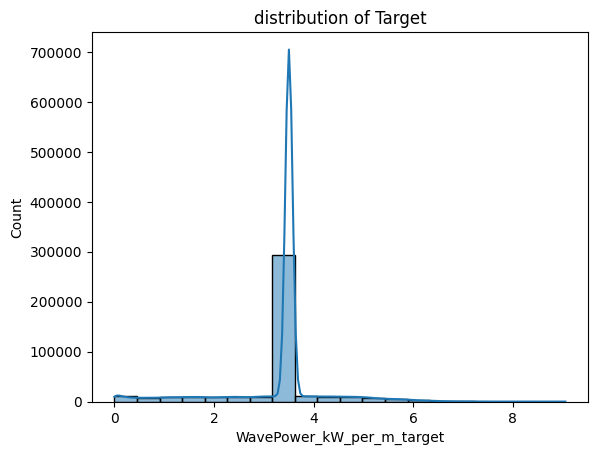

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(y_log, kde=True)
plt.title('distribution of Target')
plt.show()

## Model Iteration 1: Base model to Retrieve feature importances

Here we can claerly see by adding the new time based features __dayofyear, minute, sin_dayoftheweek__ shows to have a high F-score meaning the feature is used often and is likely important to the model.

A low F-score means the feature is rarely used, suggesting it's less important or possibly irrelevant for the model’s predictive performance. We can make the decison to not use the features with a low F-score.

Axes(0.125,0.11;0.775x0.77)


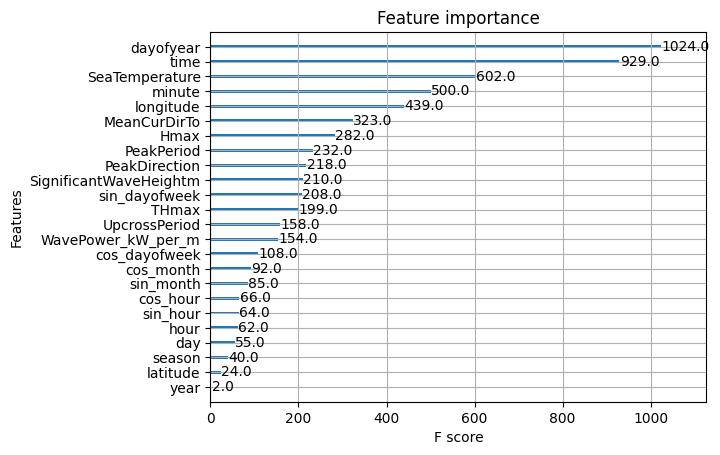

In [34]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model= xgb.XGBRegressor(objective="reg:squarederror")
model.fit(x_train, y_train)

print(xgb.plot_importance(model, importance_type='weight')) #most important features
